In [3]:
import pandas as pd

df = pd.read_csv('results.csv', header=None)

array([[<Axes: title={'center': '0'}>]], dtype=object)

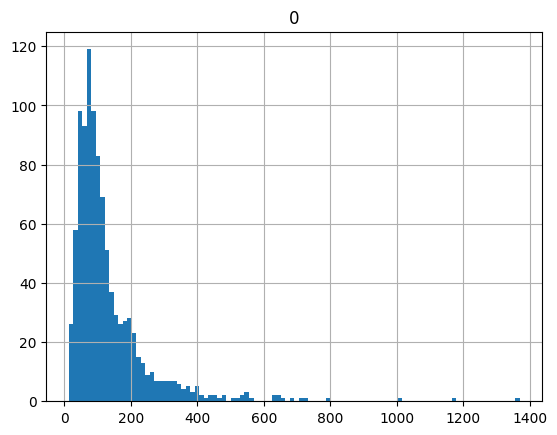

In [5]:
df.hist(bins=100)

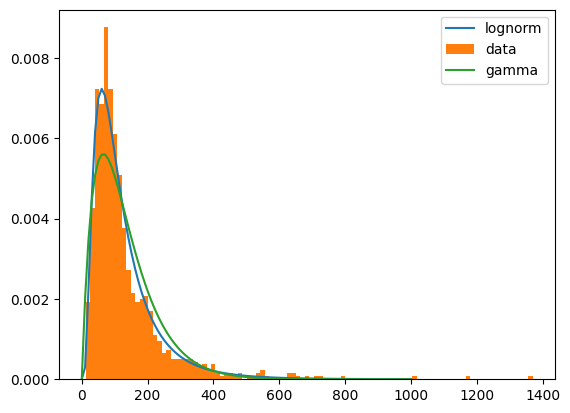

In [10]:
# fit a lognormal distribution to the data
from scipy.stats import lognorm
from matplotlib import pyplot as plt
import numpy as np

shape, loc, scale = lognorm.fit(df[0], floc=0)
x = np.linspace(0, 1000, 100)
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, label='lognorm')

# add the histogram
plt.hist(df[0], bins=100, density=True, label='data')

# add gamma distribution and display the fit error
from scipy.stats import gamma
shape, loc, scale = gamma.fit(df[0], floc=0)
pdf = gamma.pdf(x, shape, loc=loc, scale=scale)
plt.plot(x, pdf, label='gamma')
plt.legend()
plt.show()



In [11]:
# evaluate which fit is better
from scipy.stats import kstest
shape, loc, scale = lognorm.fit(df[0], floc=0)
print('lognorm', kstest(df[0], 'lognorm', args=(shape, loc, scale)))
shape, loc, scale = gamma.fit(df[0], floc=0)
print('gamma', kstest(df[0], 'gamma', args=(shape, loc, scale)))


lognorm KstestResult(statistic=0.04353184353256101, pvalue=0.04386250176382167, statistic_location=113.0, statistic_sign=1)
gamma KstestResult(statistic=0.09761799753314349, pvalue=9.54761059733946e-09, statistic_location=113.0, statistic_sign=1)


In [25]:
# run the same evaluation, where the data is smoothed by averaging neighboring values
df_s = df[0].sort_values(inplace=False).rolling(50).mean().dropna()
shape, loc, scale = lognorm.fit(df_s, floc=0)
print('lognorm', kstest(df_s, 'lognorm', args=(shape, loc, scale)))
shape, loc, scale = gamma.fit(df_s, floc=0)
print('gamma', kstest(df_s, 'gamma', args=(shape, loc, scale)))

lognorm KstestResult(statistic=0.03429020458513071, pvalue=0.2086038008439185, statistic_location=89.022, statistic_sign=1)
gamma KstestResult(statistic=0.07396763467411638, pvalue=5.698412982126802e-05, statistic_location=114.62, statistic_sign=1)
